In [1]:
import sys
import os

# Add the path to the parent directory of `src` to the sys.path
sys.path.append(os.path.abspath('C:\\Away\\FMP\\New\\guiV2_1-main_2\\src'))

%load_ext autoreload
%autoreload 2

from backend.backend.simulation import SimulationConfig, Simulation
from backend.backend.vesicle import VesicleConfig, Vesicle
from backend.backend.exterior import ExteriorConfig, Exterior
from backend.backend.ion_channels import (IonChannelConfig, 
                                          IonChannel, 
                                          ASORChannelConfig, 
                                          ASORChannel, 
                                          CLCChannelConfig, 
                                          CLCChannel, 
                                          TPCChannelConfig, 
                                          TPCChannel, 
                                          NHEChannelConfig, 
                                          NHEChannel, 
                                          VATPaseChannelConfig, 
                                          VATPaseChannel,
                                          HLeakChannelConfig,
                                          HLeakChannel,
                                          KChannelConfig,
                                          KChannel
                                        )

from backend.backend.ion_species import IonSpecies

import numpy as np
from math import exp, log

In [2]:
species_params = {
    'cl': {'exterior_conc': 20*1e-3, 'init_vesicle_conc': 159*1e-3, 'elementary_charge': -1},
    'na': {'exterior_conc': 10*1e-3, 'init_vesicle_conc': 150*1e-3, 'elementary_charge': 1},
    'k' : {'exterior_conc': 140*1e-3, 'init_vesicle_conc': 5*1e-3, 'elementary_charge': 1},
    'h' : {'exterior_conc': 12.619146889603859*1e-5, 'init_vesicle_conc': 7.962143411069938*1e-5, 'elementary_charge': 1}
}

cl_channels_params = {
    'ASOR': {
        'type': ASORChannel,
        'init_values': {
            'flux_multiplier': 1,
        },
    },
    'CLC': {
        'type': CLCChannel,
        'init_values': {
            'flux_multiplier': 2,
        },
    },      
}

na_channels_params = {
    'NHE': {
        'type': NHEChannel,
        'init_values': {
            'flux_multiplier': 1,
        },
    },
    'TPC': {
        'type': TPCChannel,
        'init_values': {
            'flux_multiplier': 1,
        },
    }, 
}

k_channels_params = {
    'K': {
        'type': KChannel,
        'init_values': {
            'flux_multiplier': 1,
        },
    },
}

h_channels_params = {
    'CLC': {
        'type': CLCChannel,
        'init_values': {
            'flux_multiplier': -1,
        },
    },
    'NHE': {
        'type': NHEChannel,
        'init_values': {
            'flux_multiplier': -1,
        },
    }, 
    'VATPase': {
        'type': VATPaseChannel,
        'init_values': {
            'flux_multiplier': -1,
        },
    },
    'HLeak': {
        'type': HLeakChannel,
        'init_values': {
            'flux_multiplier': 1,
        },
    },
}

all_channels_params = {
    'cl': cl_channels_params,
    'na': na_channels_params,
    'k': k_channels_params,
    'h': h_channels_params
}

Test_Vesicle = Vesicle(display_name='vesicle')
Test_Exterior = Exterior(display_name='exterior')

Sim = Simulation()

Sim.add_vesicle(Test_Vesicle)
Sim.add_exterior(Test_Exterior)

for ion_name, ion_params in species_params.items():
    ion_species = IonSpecies(display_name=ion_name, **ion_params)
    if ion_name == 'h':
        Sim.add_hydrogen_species(ion_species)
        
    Sim.add_ion_species(ion_species)
    
    for channel_name, channel_params in all_channels_params[ion_name].items():
        channel = channel_params['type'](display_name=f'{ion_name}_{channel_name}', **channel_params['init_values'])
        Sim.add_channel(ion_species, channel)

In [3]:
import time

start_time = time.time()

Sim.run()

end_time = time.time()

total_duration = end_time - start_time
print(f"Total simulation time: {total_duration:.2f} seconds")

Total simulation time: 4.98 seconds


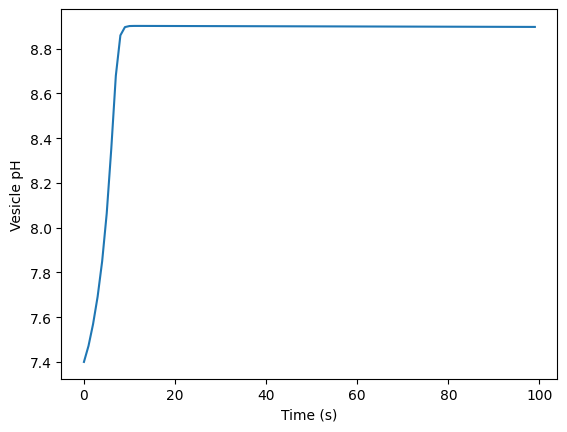

In [5]:
import matplotlib.pyplot as plt

histories_dict = Sim.histories.get_histories()

plot_every = 1000
fig, ax = plt.subplots()

ax.plot(histories_dict['simulation_time'][::plot_every], histories_dict['vesicle_pH'][::plot_every])

ax.set_xlabel('Time (s)')
ax.set_ylabel('Vesicle pH')

plt.show()